<a href="https://colab.research.google.com/github/manabtikadar/my_project/blob/main/House_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
from google.colab import files
uploaded = files.upload()

Saving HousePricePrediction.xlsx to HousePricePrediction (3).xlsx


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import copy
import math
from sklearn import metrics

In [ ]:
dataset = pd.read_excel("HousePricePrediction.xlsx")
print(dataset.head(5))

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [ ]:
dataset.shape

(2919, 13)

In [ ]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print(obj)
print("Categorical variables:",object_cols)
print('No. of. categorical features:',len(object_cols))

Id              False
MSSubClass      False
MSZoning         True
LotArea         False
LotConfig        True
BldgType         True
OverallCond     False
YearBuilt       False
YearRemodAdd    False
Exterior1st      True
BsmtFinSF2      False
TotalBsmtSF     False
SalePrice       False
dtype: bool
Categorical variables: ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features: 4


In [ ]:
int_= (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print(int_)
print("Numerical variables:",num_cols)
print('No. of. numerical features:',len(num_cols))

Id               True
MSSubClass       True
MSZoning        False
LotArea          True
LotConfig       False
BldgType        False
OverallCond      True
YearBuilt        True
YearRemodAdd     True
Exterior1st     False
BsmtFinSF2      False
TotalBsmtSF     False
SalePrice       False
dtype: bool
Numerical variables: ['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd']
No. of. numerical features: 6


In [ ]:
fal = (dataset.dtypes == 'float')
fal_cols = list(fal[fal].index)
print(fal)
print("Float Variables:",fal_cols)
print('No. of. float features:',len(fal_cols))

Id              False
MSSubClass      False
MSZoning        False
LotArea         False
LotConfig       False
BldgType        False
OverallCond     False
YearBuilt       False
YearRemodAdd    False
Exterior1st     False
BsmtFinSF2       True
TotalBsmtSF      True
SalePrice        True
dtype: bool
Float Variables: ['BsmtFinSF2', 'TotalBsmtSF', 'SalePrice']
No. of. float features: 3


In [ ]:
numerical_dataset = dataset.select_dtypes(include=['int64', 'float64'])
print(numerical_dataset.head())

   Id  MSSubClass  LotArea  OverallCond  YearBuilt  YearRemodAdd  BsmtFinSF2  \
0   0          60     8450            5       2003          2003         0.0   
1   1          20     9600            8       1976          1976         0.0   
2   2          60    11250            5       2001          2002         0.0   
3   3          70     9550            5       1915          1970         0.0   
4   4          60    14260            5       2000          2000         0.0   

   TotalBsmtSF  SalePrice  
0        856.0   208500.0  
1       1262.0   181500.0  
2        920.0   223500.0  
3        756.0   140000.0  
4       1145.0   250000.0  


<Axes: >

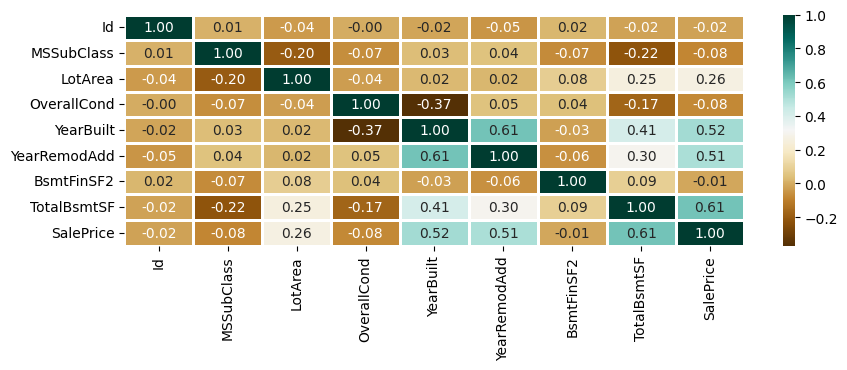

In [ ]:
plt.figure(figsize=(10, 3))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

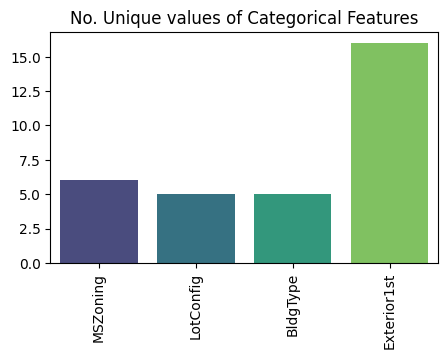

In [ ]:
unique_values = []
for col in object_cols:
    unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(5, 3))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation = 90)
sns.barplot(x=object_cols, y = unique_values, hue=object_cols, palette='viridis', legend=False)

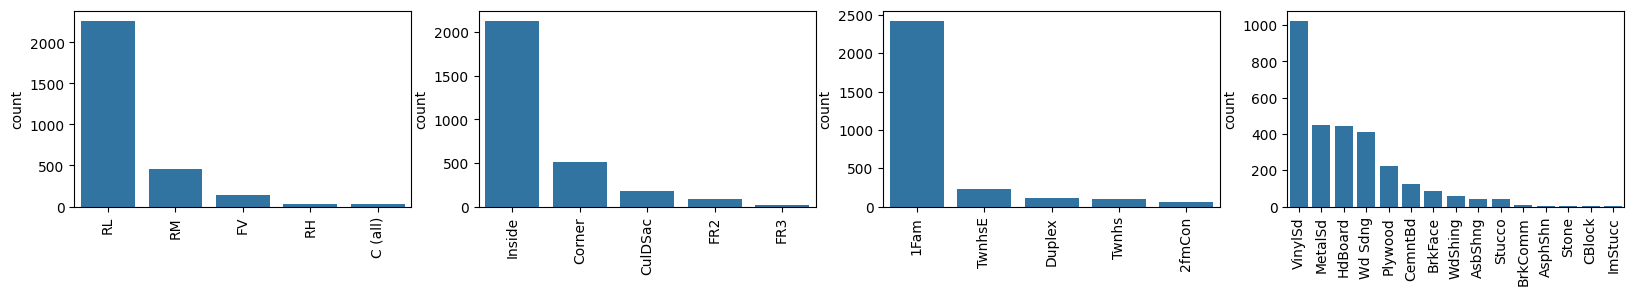

In [ ]:
plt.figure(figsize=(20,36))
# plt.title('categorical Features: Distribution')
# plt.xticks(rotation=90)
index = 1

for col in object_cols:
    y = dataset[col].value_counts()
    plt.subplot(12, 4, index)
    plt.xticks(rotation = 90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

In [ ]:
dataset.drop(['Id'],
             axis=1,
             inplace=True)

In [ ]:
dataset['SalePrice']=dataset['SalePrice'].fillna(dataset['SalePrice'].mean())

In [ ]:
new_dataset = dataset.dropna()
print(new_dataset)

      MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  YearBuilt  \
0             60       RL     8450    Inside     1Fam            5       2003   
1             20       RL     9600       FR2     1Fam            8       1976   
2             60       RL    11250    Inside     1Fam            5       2001   
3             70       RL     9550    Corner     1Fam            5       1915   
4             60       RL    14260       FR2     1Fam            5       2000   
...          ...      ...      ...       ...      ...          ...        ...   
2914         160       RM     1936    Inside    Twnhs            7       1970   
2915         160       RM     1894    Inside   TwnhsE            5       1970   
2916          20       RL    20000    Inside     1Fam            7       1960   
2917          85       RL    10441    Inside     1Fam            5       1992   
2918          60       RL     9627    Inside     1Fam            5       1993   

      YearRemodAdd Exterior

In [ ]:
print(new_dataset.isnull().sum())

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64


In [ ]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols =list(s[s].index)
print("Categorical variables:",object_cols)
print('No. of. categorical features:',len(object_cols))

Categorical variables: ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features: 4


In [ ]:
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis =1)
df_final = pd.concat([df_final, OH_cols], axis =1)

In [ ]:
X_train = df_final.drop('SalePrice', axis=1)
Y_train = df_final['SalePrice'].values.reshape(-1,1)
print(X_train.shape)
print(Y_train.shape)
X_features = X_train.columns
print(X_features)
print(len(X_features))

(2913, 37)
(2913, 1)
Index(['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF2', 'TotalBsmtSF', 'MSZoning_C (all)', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotConfig_Corner',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'LotConfig_Inside', 'BldgType_1Fam', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'Exterior1st_AsbShng', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing'],
      dtype='object')
37


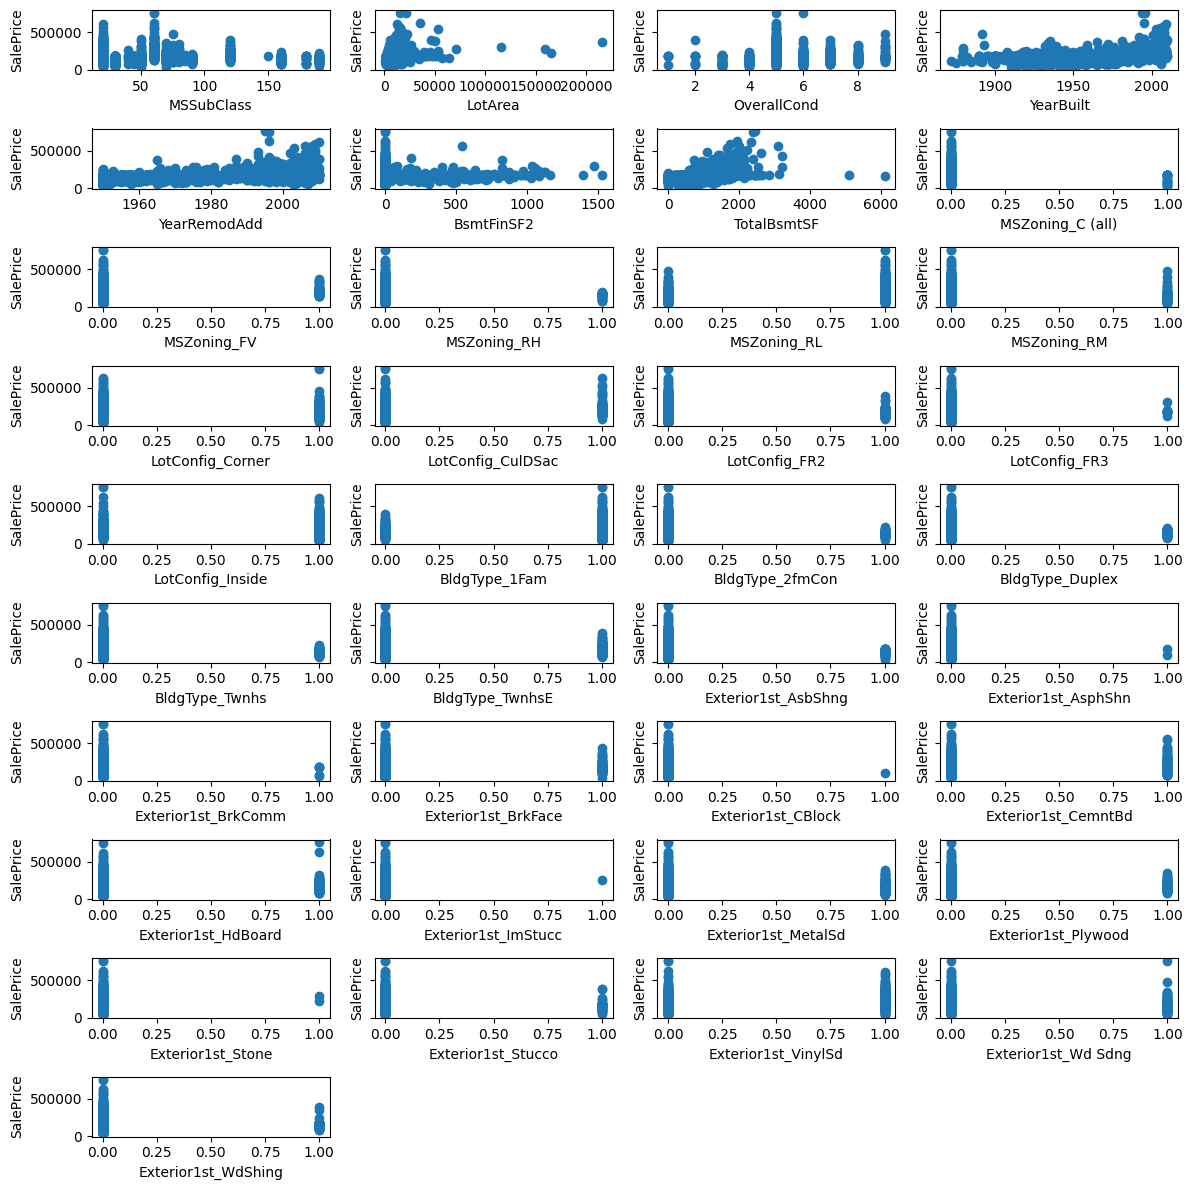

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(10, 4, figsize=(12, 12), sharey=True)

# Flatten the axs array to easily iterate
axs = axs.flatten()

for i, ax in enumerate(axs):  # Use enumerate for index and ax
    if i < len(X_train.columns):  # Prevent index error if more subplots than columns
        ax.scatter(X_train.iloc[:, i], Y_train)  # Use .iloc to access DataFrame columns
        ax.set_xlabel(X_features[i])
        axs[i].set_ylabel("SalePrice")
    else:
        # Hide extra subplots if any
        ax.axis('off')

#axs[0].set_ylabel("SalePrice")  # Set ylabel for the first subplot
plt.tight_layout()  # Improve spacing
plt.show()

In [ ]:
def compute_cost(X, Y, W, b):
    """
    Compute the cost function for linear regression.

    Args:
        X (pd.DataFrame or np.ndarray): Feature matrix.
        Y (np.ndarray): Target variable vector.
        W (np.ndarray): Weight vector.
        b (float): Bias term.

    Returns:
        float: The total cost.
    """
    m = X.shape[0]
    cost = 0
    for i in range(m):
        # Use .iloc to access DataFrame rows by index if X is a DataFrame
        # Otherwise, assume X is a NumPy array and use standard indexing
        f_wb_i = np.dot(X.iloc[i].values if isinstance(X, pd.DataFrame) else X[i], W) + b
        cost +=(f_wb_i - Y[i])**2

    total_cost = 1 / (2 * m) *(cost)
    return total_cost

In [ ]:
W_in = np.zeros(X_train.shape[1])
b_in = 0.0
cost = compute_cost(X_train,Y_train,W_in,b_in)
print(cost)

[1.79467255e+10]


In [ ]:
def compute_gradient(X, Y, W, b):
    m, n = X.shape  # m: number of examples, n: number of features
    dj_dw = np.zeros((n,))  # Gradient for weights
    dj_db = 0.0  # Gradient for bias

    for i in range(m):
        # Extract a single training example (row) and ensure it's a NumPy array
        # Use .iloc to access DataFrame rows by index if X is a DataFrame
        # Otherwise, assume X is a NumPy array and use standard indexing
        x_i = np.array(X.iloc[i].values if isinstance(X, pd.DataFrame) else X[i])
        # Use standard indexing for Y as it's a NumPy array
        error = (np.dot(x_i, W) + b) - Y[i]  # Compute error as a scalar

        # Update gradients
        for j in range(n):
            dj_dw[j] += (error * x_i[j])  # Explicitly treat x_i[j] as scalar
        dj_db += error  # Update bias gradient

    # Average the gradients
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [ ]:
temp_dj_dw, temp_dj_db = compute_gradient(X_train,Y_train,W_in,b_in)
print(f'dj_db at initial w,b: {temp_dj_db}')
print(f'dj_dw at initial w,b: \n {temp_dj_dw}')

<ipython-input-82-b4fb929c4a53>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dj_dw[j] += (error * x_i[j])  # Explicitly treat x_i[j] as scalar


dj_db at initial w,b: [-180921.19589042]
dj_dw at initial w,b: 
 [-1.02050562e+07 -1.93890374e+09 -1.00369935e+06 -3.57294876e+08
 -3.59421111e+08 -8.91284304e+06 -2.01185303e+08 -1.18746925e+03
 -9.37146670e+03 -1.34368210e+03 -1.44597336e+05 -2.44212417e+04
 -3.18006926e+04 -1.23164683e+04 -5.23100942e+03 -8.45242280e+02
 -1.30727783e+05 -1.52267888e+05 -3.29212395e+03 -5.92401104e+03
 -5.29798262e+03 -1.41391899e+04 -2.16577360e+03 -9.64370738e+01
 -2.97179809e+02 -5.63773919e+03 -3.60453141e+01 -8.88877711e+03
 -2.60919523e+04 -8.99416409e+01 -2.55076666e+04 -1.35413224e+04
 -1.77480261e+02 -2.51676331e+03 -6.94618105e+04 -2.32043878e+04
 -3.20791894e+03]


In [ ]:
def run_gradient_descent(X, Y, W_in, b_in, alpha, num_iters):
    J_history = []
    W = copy.deepcopy(W_in)
    b = b_in

    for i in range(num_iters):
        # Compute gradients
        dj_dw, dj_db = compute_gradient(X, Y, W, b)  # Fixed: Swapped dj_db and dj_dw

        # Update weights and bias
        W = W - alpha * dj_dw
        b = b - alpha * dj_db

        # Compute cost and append to history
        cost_value = compute_cost(X, Y, W, b)

        # Check if cost_value is an ndarray and has more than one element
        if isinstance(cost_value, np.ndarray) and cost_value.size > 1:
            raise ValueError("compute_cost function is returning an array with more than one element.")
        # If it's a single-element array, extract the scalar value
        elif isinstance(cost_value, np.ndarray):
            cost_value = cost_value.item()

        J_history.append(cost_value)

        # Print cost at regular intervals
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4}: Cost {cost_value:8.2f}")

    return W, b, J_history

In [ ]:
_,_,hist = run_gradient_descent(X_train,Y_train,W_in,b_in,0.000000000001,1000)

<ipython-input-82-b4fb929c4a53>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dj_dw[j] += (error * x_i[j])  # Explicitly treat x_i[j] as scalar


Iteration    0: Cost 17942669034.92
Iteration  100: Cost 17543852513.99
Iteration  200: Cost 17158265564.42
Iteration  300: Cost 16785466131.73
Iteration  400: Cost 16425026934.36
Iteration  500: Cost 16076534969.91
Iteration  600: Cost 15739591038.01
Iteration  700: Cost 15413809279.01
Iteration  800: Cost 15098816728.21
Iteration  900: Cost 14794252884.87


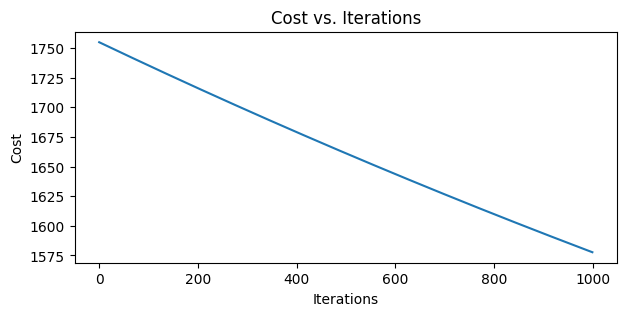

In [ ]:
plt.figure(figsize=(7, 3))
plt.plot(hist)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs. Iterations")
plt.show()

In [ ]:
def zscore_normalization_features(X):
  mu = np.mean(X,axis=0)
  sigma = np.std(X,axis=0)
  X_norm = (X-mu)/sigma

  return (X_norm,mu,sigma)


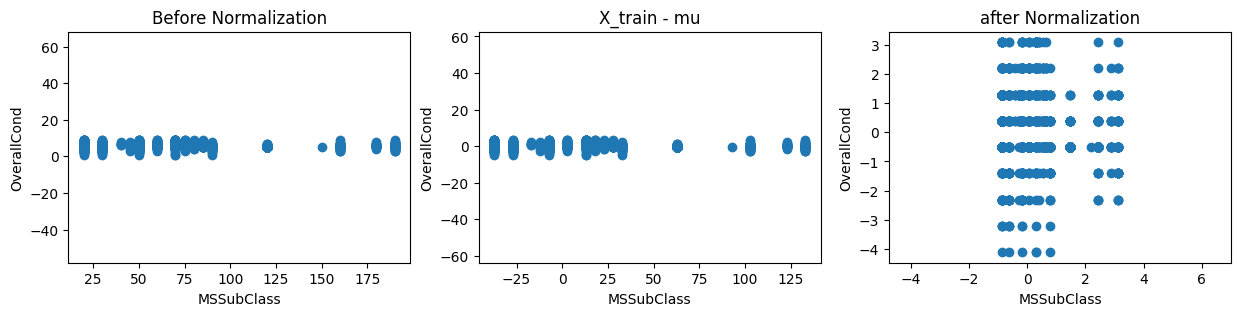

In [ ]:
mu = np.mean(X_train,axis=0)
mu1 = np.mean(Y_train,axis=0)
sigma = np.std(X_train,axis=0)
sigma1 = np.std(Y_train,axis=0)
X_mean = X_train-mu
X_norm = (X_train-mu)/sigma
y_norm = (Y_train-mu1)/sigma1

fig,ax=plt.subplots(1,3,figsize=(15,3))
ax[0].scatter(X_train.iloc[:,0],X_train.iloc[:,2])
ax[0].set_xlabel(X_features[0])
ax[0].set_ylabel(X_features[2])
ax[0].set_title('Before Normalization')
ax[0].axis('equal')

ax[1].scatter(X_mean.iloc[:,0],X_mean.iloc[:,2])
ax[1].set_xlabel(X_features[0])
ax[1].set_ylabel(X_features[2])
ax[1].set_title('X_train - mu')
ax[1].axis('equal')

ax[2].scatter(X_norm.iloc[:,0],X_norm.iloc[:,2])
ax[2].set_xlabel(X_features[0])
ax[2].set_ylabel(X_features[2])
ax[2].set_title('after Normalization')
ax[2].axis('equal')

plt.show()

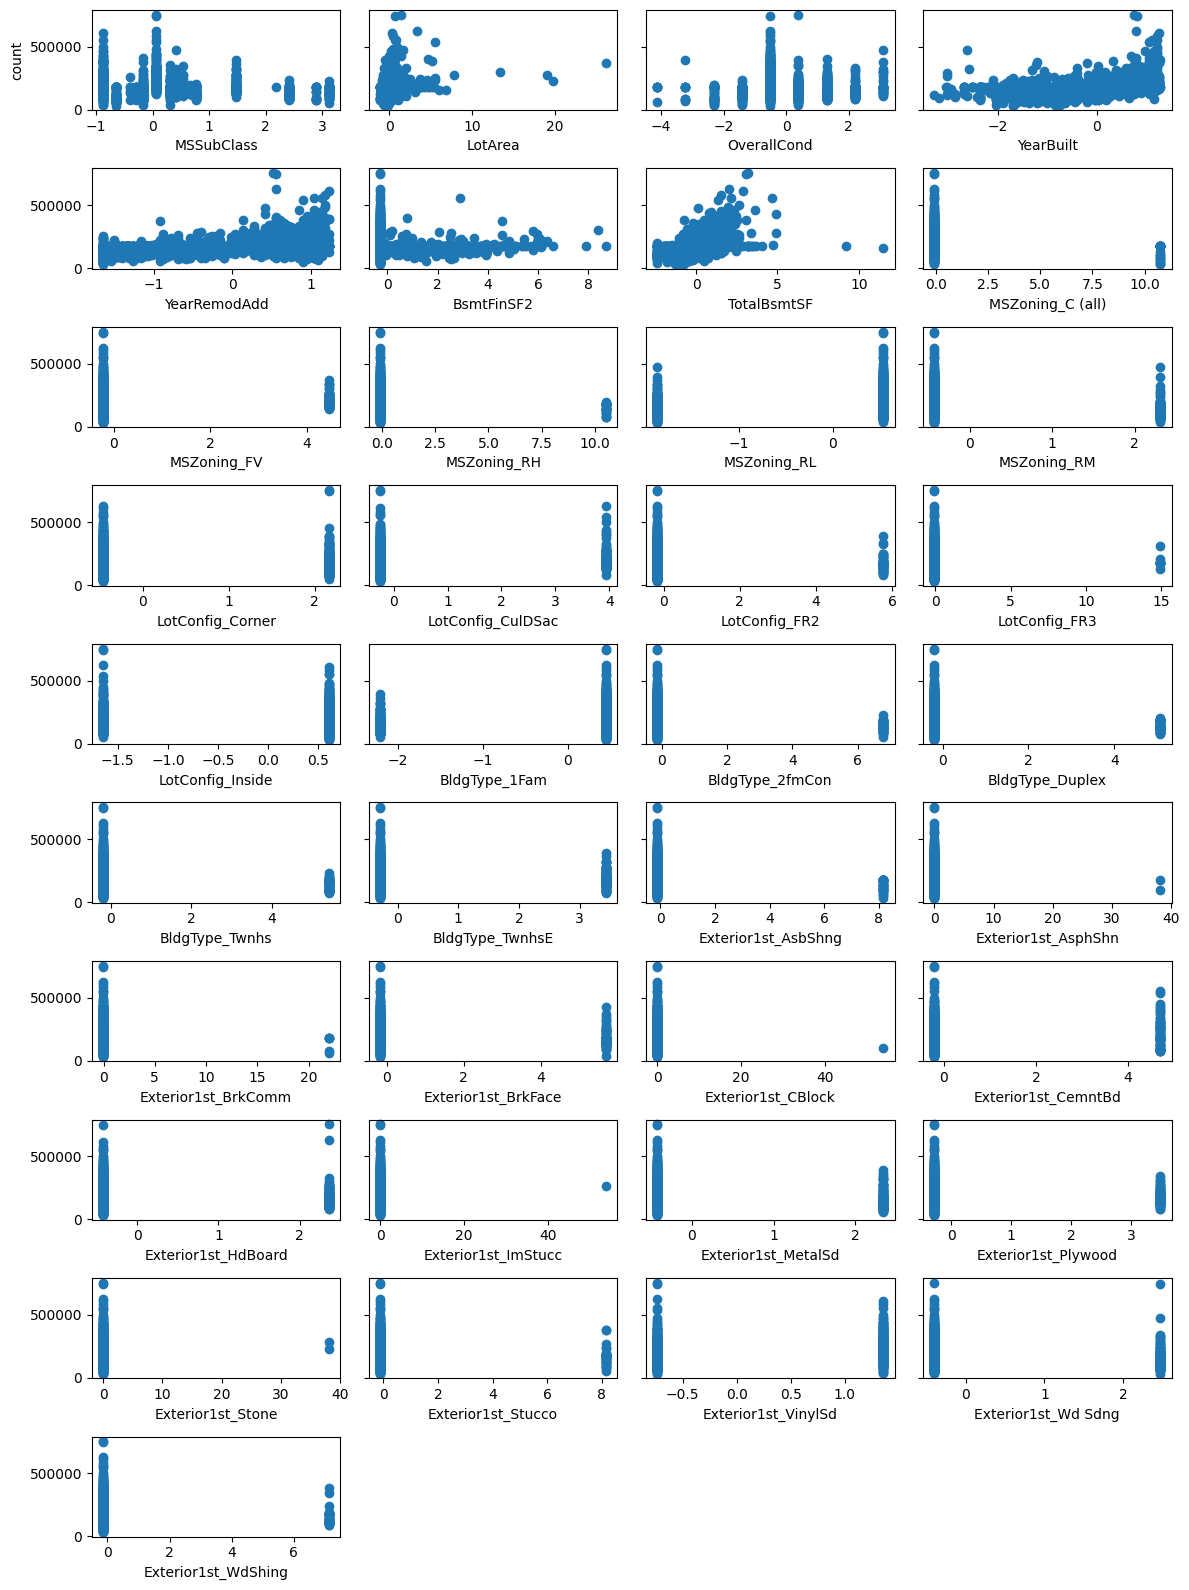

In [ ]:
fig,ax = plt.subplots(10,4,figsize=(12,16),sharey=True)

axs = ax.flatten()

for i, ax in enumerate(axs):
  if i < len(X_train.columns):
    ax.scatter(X_norm.iloc[:,i],Y_train)
    ax.set_xlabel(X_features[i])
  else:
    ax.axis('off')

axs[0].set_ylabel("count")
plt.tight_layout()
plt.show()

In [ ]:
W_norm,b_norm,hist_norm = run_gradient_descent(X_norm,Y_train,W_in,b_in,0.001,1000)

<ipython-input-82-b4fb929c4a53>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dj_dw[j] += (error * x_i[j])  # Explicitly treat x_i[j] as scalar


Iteration    0: Cost  1753.41
Iteration  100: Cost  1592.57
Iteration  200: Cost  1450.26
Iteration  300: Cost  1323.87
Iteration  400: Cost  1211.43
Iteration  500: Cost  1111.38
Iteration  600: Cost  1022.47
Iteration  700: Cost   943.59
Iteration  800: Cost   873.79
Iteration  900: Cost   812.23


In [ ]:
m = X_norm.shape[0]
y_pred = np.zeros(m)
for i in range(m):
  y_pred[i] = np.dot(X_norm.iloc[i].values,W_norm)+b_norm

<ipython-input-115-db40d63c750f>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = np.dot(X_norm.iloc[i].values,W_norm)+b_norm


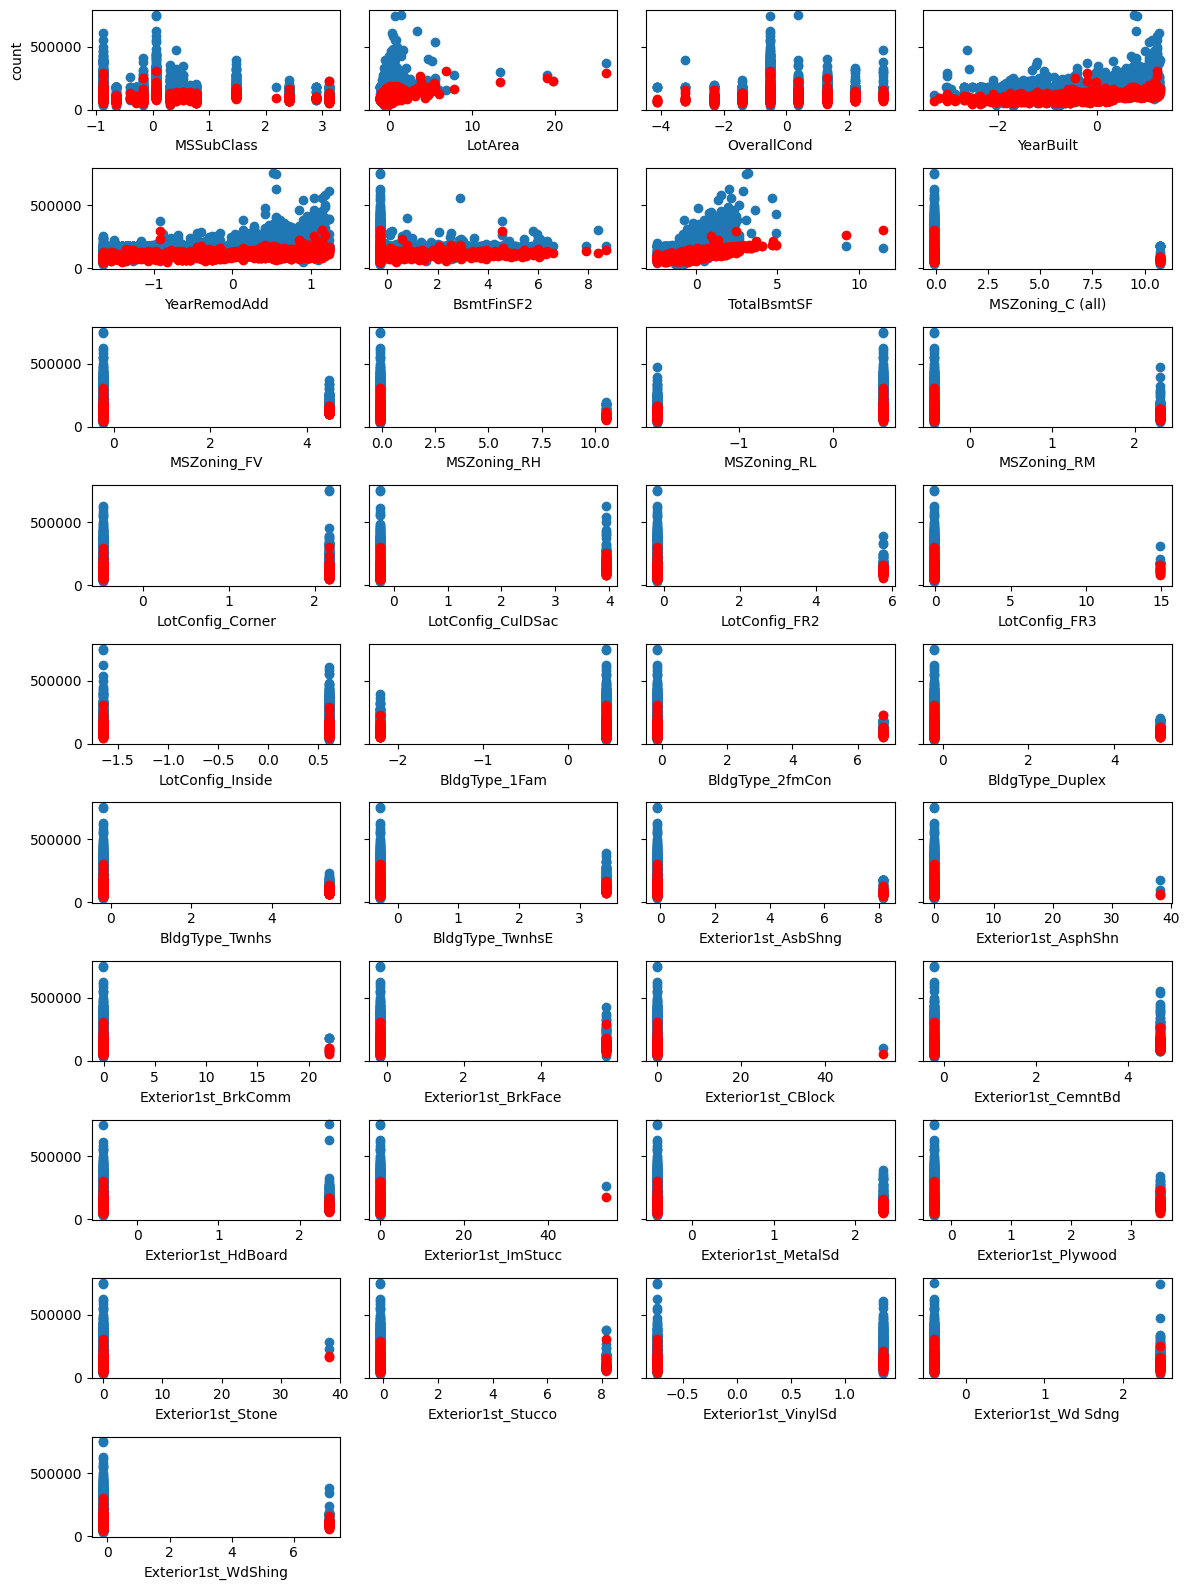

In [ ]:
fig,ax = plt.subplots(10,4,figsize=(12,16),sharey=True)

axs = ax.flatten()

for i, ax in enumerate(axs):
  if i < len(X_train.columns):
    ax.scatter(X_norm.iloc[:,i],Y_train,label='target')
    ax.scatter(X_norm.iloc[:,i],y_pred,color='red',label='prediction')
    ax.set_xlabel(X_features[i])
  else:
    ax.axis('off')

axs[0].set_ylabel("count")
plt.tight_layout()
plt.show()

In [ ]:
score_1 = metrics.r2_score(Y_train, y_pred)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, y_pred)

print('R Sqaured Error:', score_1)
print('Mean Absolute Error:', score_2)

R Sqaured Error: -1.121473964892711
Mean Absolute Error: 67343.14433634335


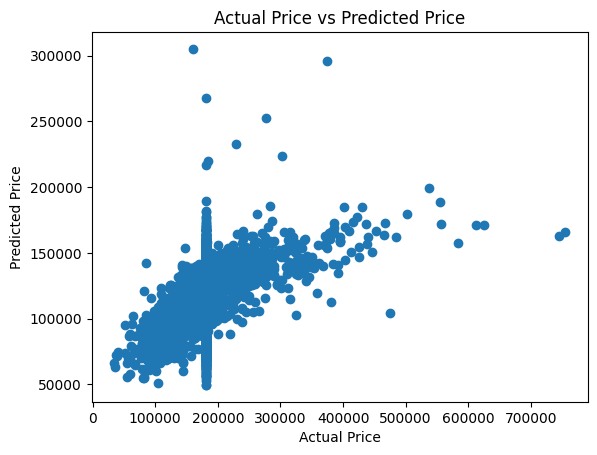

In [ ]:
plt.scatter(Y_train, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()